In [2]:
import ndude_sim as sim

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
%load_ext autoreload

source = "Einstein256_256"
delta = 0.1;
#k_rnncandac, est_loss_rnncandac, err_dude_k_rnncandac, err_nn_k_rnncandac, x_dude_hat_rnncandac, x_nn_hat_rnncandac, x_rnncandac, z_rnncandac = sim.simulate_ndude(source=source, k_max=42, delta=delta, relmodel=False, architecture="rnncandac")
#k_rnn, est_loss_rnn, err_dude_k_rnn, err_nn_k_rnn, x_dude_hat_rnn, x_nn_hat_rnn, x_rnn, z_rnn = sim.simulate_ndude(source=source, k_max=42, delta=delta, relmodel=False, architecture="rnn")
k_dnn, est_loss_dnn, err_dude_k_dnn, err_nn_k_dnn, x_dude_hat_dnn, x_nn_hat_dnn, x_dnn, z_dnn = sim.simulate_ndude(source=source, k_max=100, delta=delta, relmodel=False, architecture="dnn")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Lnew: [[ 1.025  1.25   0.   ]
 [ 1.025  0.     1.25 ]]
k range:  range(1, 43)
k= 1
Model fitting...
Saving model...
error_nn= 0.100784301758
error_dude= 0.100784301758
k= 2
Model fitting...
Saving model...
error_nn= 0.100784301758
error_dude= 0.0941925048828
k= 3
Model fitting...
Saving model...
error_nn= 0.0973968505859
error_dude= 0.092041015625
k= 4
Model fitting...
Saving model...
error_nn= 0.0930328369141
error_dude= 0.0917816162109
k= 5
Model fitting...
Saving model...
error_nn= 0.0630950927734
error_dude= 0.0547790527344
k= 6
Model fitting...
Saving model...
error_nn= 0.0625305175781
error_dude= 0.0584106445312
k= 7
Model fitting...
Saving model...
error_nn= 0.0604248046875
error_dude= 0.0630950927734
k= 8
Model fitting...
Saving model...
error_nn= 0.0574188232422
error_dude= 0.0708618164062
k= 9
Model fitting...
Saving model...
error_nn= 0.0558929443359
error_dude= 0.0767822265625
k= 10
Mode

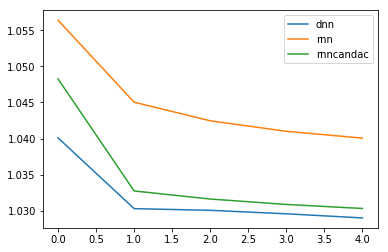

In [24]:
import pickle

def load_history(source, architecture, k):
    filename = 'histories/'+architecture+'/'+source+'_k_'+str(k)+'.p'
    f = open(filename, "rb")
    history = pickle.load(f)
    f.close()
    return history
k = 30

history_dnn = load_history( source, "dnn", k)
history_rnn = load_history( source, "rnn", k)
history_rnncandac = load_history( source, "rnncandac", k)
plt.plot(history_dnn['loss'])
plt.plot(history_rnn['loss'])
plt.plot(history_rnncandac['loss'])
plt.legend(["dnn", "rnn","rnncandac"])

In [15]:
plt.plot(k,err_dude_k/delta,'r',linewidth=2.0)
plt.plot(k,est_loss[0,:]/delta,'r-*',linewidth=2.0)
# plt.plot(k,0.558*np.ones(15),'k',linewidth=2.0)
plt.ylim((0,1.5))
plt.xlabel('Window size k',fontsize=16)
plt.ylabel('(Bit Error Rate) / $\delta$',fontsize=16)
plt.legend(['DUDE BER','DUDE Estimated BER'],loc='upper right',fontsize=14)
# plt.savefig('/Users/tsmoon/Dropbox/Professional/Research/1. Papers/2016/ICML/Neural universal denoiser/figures/Einstein_dude_est_ber.pdf')

NameError: name 'k' is not defined

0.1


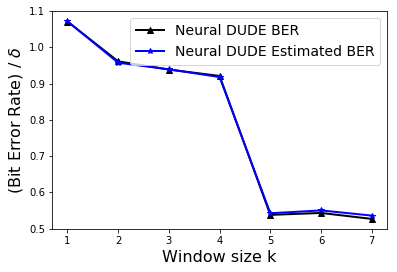

In [3]:
plt.plot(k,err_nn_k/delta,'k-^',linewidth=2.0)
plt.plot(k,est_loss[1,:]/delta,'b-*',linewidth=2.0)
# plt.plot(k,0.558*np.ones(15),'k',linewidth=2.0)
print(delta)
#plt.ylim((0,1))
plt.xlabel('Window size k',fontsize=16)
plt.ylabel('(Bit Error Rate) / $\delta$',fontsize=16)
plt.legend(['Neural DUDE BER','Neural DUDE Estimated BER'],loc='upper right',fontsize=14)
# plt.savefig('/Users/tsmoon/Dropbox/Professional/Research/1. Papers/2016/ICML/Neural universal denoiser/figures/Einstein_n_dude_est_ber.pdf')

In [4]:
matplotlib.rcParams['text.usetex'] = True

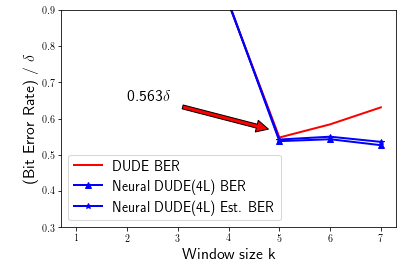

In [5]:
plt.plot(k,err_dude_k/delta,'r',linewidth=2.0)
plt.plot(k,err_nn_k/delta,'b-^',linewidth=2.0)
plt.plot(k,est_loss[1,:]/delta,'b-*',linewidth=2.0)

plt.legend(['DUDE BER','Neural DUDE(4L) BER','Neural DUDE(4L) Est. BER'],fontsize=14)
plt.ylim((0.3,0.9))
plt.xlabel('Window size k',fontsize=16)
plt.ylabel('(Bit Error Rate) / $\delta$',fontsize=16)
plt.annotate('0.404$\delta$', xy=(36, 0.404), xytext=(30, 0.6),
            arrowprops=dict(facecolor='blue', shrink=0.1),fontsize=16
            )
plt.annotate('0.563$\delta$', xy=(5, 0.563), xytext=(2, 0.65),
            arrowprops=dict(facecolor='red', shrink=0.1),fontsize=16
            )
# plt.savefig('/Users/tsmoon/Dropbox/Professional/Research/1. Papers/2016/NIPS_camera_ready/figures/Einstein_delta_0_1_k_40.pdf')

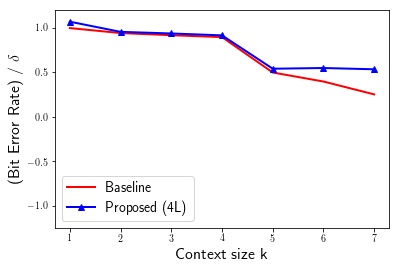

In [6]:
plt.plot(k,est_loss[0,]*10,'r',linewidth=2.0)
plt.plot(k,est_loss[1,]*10,'b-^',linewidth=2.0)
plt.legend(['Baseline','Proposed (4L)'],fontsize=14)
# plt.legend(['DUDE','Neural DUDE (4L)'])

plt.ylim((-1.25,1.2))
plt.xlabel('Context size k',fontsize=16)
plt.ylabel('(Bit Error Rate) / $\delta$',fontsize=16)
# plt.savefig('lena_est_ber_k_27_nrf.pdf')

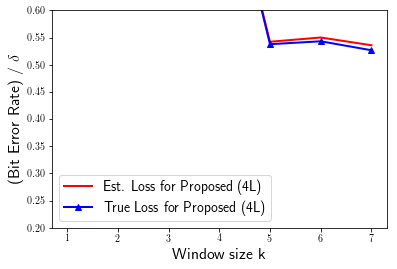

In [7]:
plt.plot(k,est_loss[1,]*10,'r',linewidth=2.0)
plt.plot(k,err_nn_k*10,'b-^',linewidth=2.0)
plt.ylim((0.2,0.6))
plt.legend(['Est. Loss for Proposed (4L)','True Loss for Proposed (4L)'],fontsize=14)
# plt.legend(['Est. Loss for Neural DUDE (4L)','True Loss for Neural DUDE (4L)'])

plt.xlabel('Window size k',fontsize=16)
plt.ylabel('(Bit Error Rate) / $\delta$',fontsize=16)
# plt.savefig('lena_est_true_ber_neural_dude_nrf.pdf')

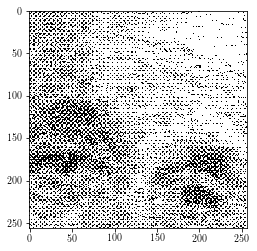

In [8]:
plt.imshow(x_dude_hat.reshape((256,256)),cmap=plt.cm.gray)

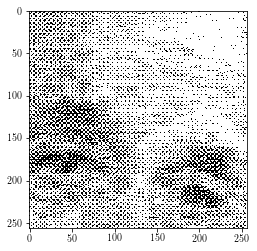

In [9]:
plt.imshow(x_nn_hat.reshape((256,256)),cmap=plt.cm.gray)

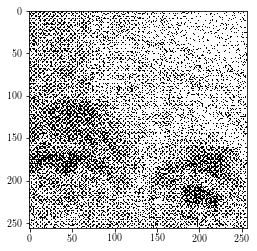

In [10]:
plt.imshow(z.reshape((256,256)),cmap=plt.cm.gray)

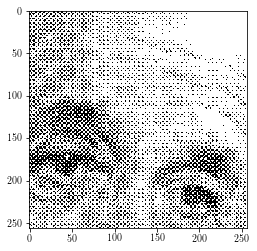

In [11]:
plt.imshow(x.reshape((256,256)),cmap=plt.cm.gray)